In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

# import iris
from sklearn.datasets import load_iris

# define where it stores
# os.getcwd() # 'C:\\Users\\Raymo'
iris = load_iris() 

# print(iris)

# it is a dictionary, the key 'data' represents 4 features, including 
'''
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
'''

# the key 'target' is the result, 
'''
class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica
'''


'\nclass:\n-- Iris Setosa\n-- Iris Versicolour\n-- Iris Virginica\n'

In [11]:
# split train and test, the odd idx is for test, the even ids is for train
x_train = iris['data'][0::2]
x_test = iris['data'][1::2]
y_train = iris['target'][0::2]
y_test = iris['target'][1::2]


In [3]:
'''
svm, RF, MLP full connection
'''
# first is for SVM
from sklearn import svm
model_1 = svm.SVC(kernel = 'linear')
# train
model_1.fit(x_train, y_train)

# validation
y_valid = model_1.predict(x_train)

# test
y_predict = model_1.predict(x_test)

# Evaluation

resval = np.mean(y_valid == y_train)
res = np.mean(y_predict == y_test)

# result and conclusion
print(f'For svm, the validation accurracy is {round(resval * 100, 2)}%, \ntesting accurracy is {round(res * 100, 2)}%')


# simple model structure, fixed result 

For svm, the validation accurracy is 97.33%, 
testing accurracy is 97.33%


In [12]:
# Next is for RF
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_estimators = 10)

# train
model_2.fit(x_train, y_train)

# validation and test
y_valid, y_predict = model_2.predict(x_train), model_2.predict(x_test)

# evaluation
resval, res = np.mean(y_valid == y_train), np.mean(y_test == y_predict)

# result and conclusion
print(f'For Random Forest (RF), the validation accurracy is {round(resval * 100, 2)}%,\ntesting accurracy is {round(res*100, 2)}%')

# Comparing to SVM, it has better internal validation result but poorer and a bit unstable testing result

For Random Forest (RF), the validation accurracy is 100.0%,
testing accurracy is 96.0%


In [5]:
# and then is for MLP classifier (full connection)
from sklearn.neural_network import MLPClassifier

# model
model_3 = MLPClassifier(hidden_layer_sizes = (64,64,64,64), activation = 'tanh', alpha = 0.0001, learning_rate = 'adaptive')
# help(MLPClassifier)

# train
model_3.fit(x_train, y_train)

# validation and test
y_valid, y_predict = model_3.predict(x_train), model_3.predict(x_test)

# evaluation
resval, res = np.mean(y_valid == y_train), np.mean(y_predict == y_test)

# result and conclusion
print(f'For MLP classifier, the validation accurracy is {round(resval * 100, 2)}%, \ntesting accurracy is {round(res * 100, 2)}%')

# The result can be high sometimes, however, is unstable
# when hidden layer size is large enough, it tends to be stable, however, it would be slow due to oversized calculation amounts

For MLP classifier, the validation accurracy is 100.0%, 
testing accurracy is 96.0%


C:\Users\Raymo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity

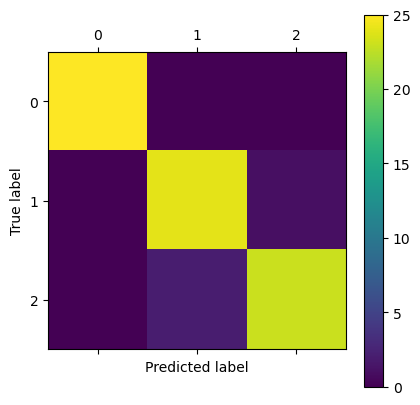

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.92      0.96      0.94        25
           2       0.96      0.92      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [13]:
from sklearn import metrics, model_selection 
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_predict)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(metrics.classification_report(y_test, y_predict))

In [14]:
# cross-validation
x = iris['data']
y = iris['target']
CV=10 # 10-fold
scores = model_selection.cross_val_score(svm.SVC(kernel='linear'), x, y, cv=CV)

print("Accuracy on iris data: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

Accuracy on iris data: 0.9733 (+/- 0.0442)


C:\Users\Raymo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For MLP, acc on iris data is 98.0 (+/- 4.27)%


C:\Users\Raymo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Raymo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.88,
  0.9466666666666667,
  0.9733333333333334,
  0.96])

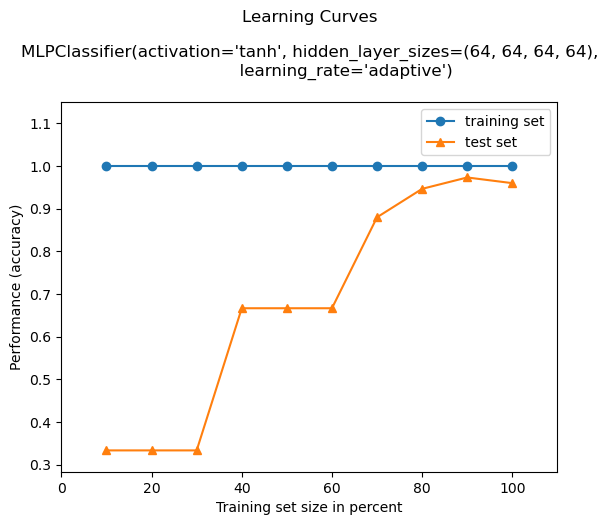

In [15]:
# cross validation for MLP

scores = model_selection.cross_val_score(model_3, x, y, cv=CV)
print(f'For MLP, acc on iris data is {round(scores.mean() * 100, 2)} (+/- {round(scores.std() * 100, 2)})%')

from mlxtend.plotting import plot_learning_curves
plot_learning_curves(x_train, y_train, x_test, y_test, model_3, scoring='accuracy')

For Decision Tree, acc on iris data is 95.33 (+/- 4.27)%


([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.8133333333333334,
  0.9066666666666666,
  0.9466666666666667,
  0.96])

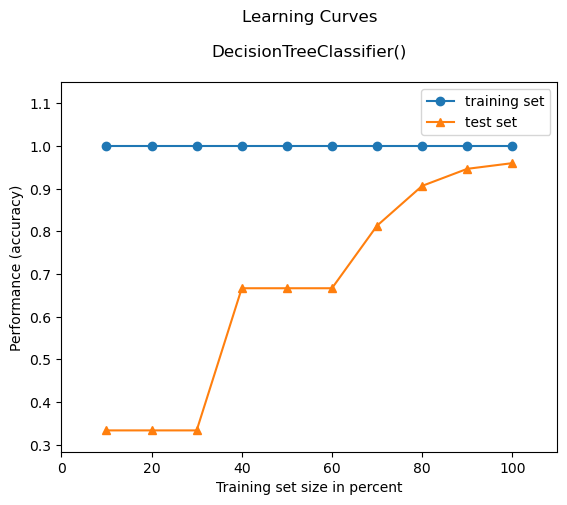

In [19]:
from sklearn import tree
model_DT = tree.DecisionTreeClassifier()
model_DT.fit(x_train, y_train)

# cross validation for MLP

scores = model_selection.cross_val_score(model_DT, x, y, cv=CV)
print(f'For Decision Tree, acc on iris data is {round(scores.mean() * 100, 2)} (+/- {round(scores.std() * 100, 2)})%')

from mlxtend.plotting import plot_learning_curves
plot_learning_curves(x_train, y_train, x_test, y_test, model_DT, scoring='accuracy')